<a href="https://colab.research.google.com/github/tillaczel/Machin-learning-workshop/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression
Linear regression can be represented by a neural network (NN) with no hidden layer, a singel neuron and a linear activation function (for simplicity I have only one input as well). To train the model the forward and backward pass needs to be calculated. The forward pass of the NN is calculated by: $\hat{y}=wx+b$. I am using the mean squared error as my loss function: $L=\frac{1}{2}(\hat{y}-y)^2$. The parcial derivatives of the loss function with respect to the weight and the bias are:
$$\frac{\partial L}{\partial w} =(wx-y)x$$ $$\frac{\partial L}{\partial b}=wx-y$$
The update to the weight and bias are: 
$$w \leftarrow w-\alpha (wx-y)x$$  $$b \leftarrow b-\alpha (wx-y)$$ 
where $\alpha$ is the learning rate.


## Importing libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Defineing the neural network and visualization

In [0]:
class neuron():

    def __init__(self,learning_rate):
        self.learning_rate = learning_rate
        
        self.w = np.random.randn(1)
        self.b = np.random.randn(1)
        
    def predict(self,X):
        return self.w*X+self.b
    
    def train(self,X,Y,epoch):
        for e in range(epoch):
            dz = self.w*X+self.b-Y
            dw = np.mean(dz*X)
            db = np.mean(dz)
            self.w += -learning_rate*dw
            self.b += -learning_rate*db
            
def vis(X,Y,old_model_prediction):
    fig = plt.figure(figsize=(12,6))
    
    plt.subplot(1,2,1)
    plt.scatter(X,Y,label='Data')
    plt.plot(X,old_model_prediction,label='Linear regression')
    plt.legend()
    plt.title('Data and the prediction of the model before training')
    
    plt.subplot(1,2,2)
    plt.scatter(X,Y,label='Data')
    plt.plot(X,model.predict(X),label='Linear regression')
    plt.legend()
    plt.title('Data and the prediction of the model after training')

## Experiment 1: linear data

In [0]:
learning_rate = 0.01
model = neuron(learning_rate)

Creating the data and saving the prediction of the initialized model.

In [0]:
w = -0.7
b = 2.5
X = np.arange(11)-5
Y = w*X+b
old_model_prediction = model.predict(X)

Training the network and wisualizeing the resutls

Optimal value for weight is -0.7, trained value is -0.7.
Optimal value for bias is 2.5, trained value is 2.4999.


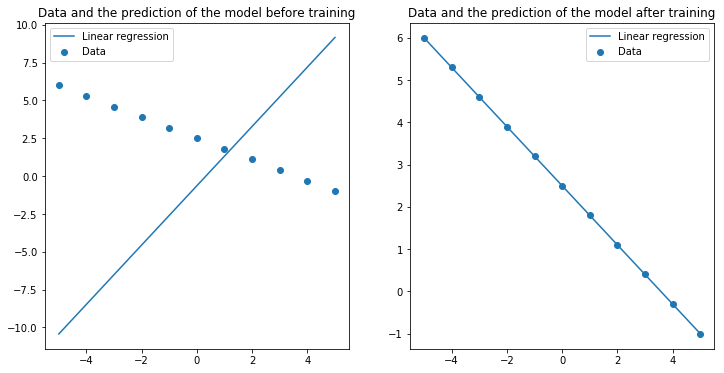

In [0]:
model.train(X,Y,1000)
vis(X,Y,old_model_prediction)
print(f'Optimal value for weight is {w}, trained value is {np.asscalar(np.round(model.w,4))}.')
print(f'Optimal value for bias is {b}, trained value is {np.asscalar(np.round(model.b,4))}.')

## Experiment 2: quadratic function

In [0]:
learning_rate = 0.01
model = neuron(learning_rate)

By changing the equation of $Y$ the underlieng function can be changed.

In [0]:
w = 1
b = -2
X = np.arange(11)-5
Y = w*X**2+b
old_model_prediction = model.predict(X)

A neural network with no hidden layer, one neuron and linear activation function is unable to fit well to the quadratic data. The model is not complex enough, it has high bias. A neural network needs to have at least one hidden layer (and finite amount of neurons in the hidden layer) to be able to approximate any function (universal approximation theorem). Aldough one hidden layer is enough, there are cases where a network with more hidden layers, but much less neurons per layer (and so  in total with less parameters) can approximate complex functions with higher precision.

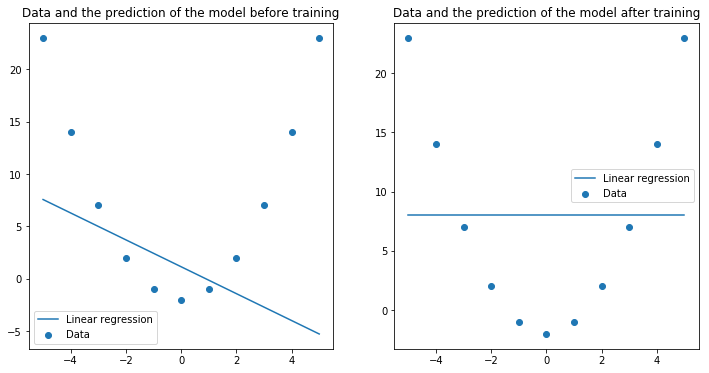

In [0]:
model.train(X,Y,1000)
vis(X,Y,old_model_prediction)